In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [4]:
from tensorflow.keras.preprocessing import image

In [5]:
from keras.preprocessing import image

In [6]:
from keras.preprocessing.image import img_to_array

In [7]:
model=VGG16(weights='imagenet', include_top=False, input_shape=(224, 224,3))

In [8]:
from tensorflow.keras.applications import MobileNetV2

In [9]:
model2=MobileNetV2(weights='imagenet')

In [1]:
direct=r"dataset"
data=[]
labels=[]
categories=['with_mask', 'without_mask']

In [2]:
from keras.preprocessing.image import load_img
for i in categories:
    path=os.path.join(direct, i)
    for j in os.listdir(path):
        imgloc=os.path.join(path, j)
        image=load_img(imgloc, target_size=(224,224))
        image=img_to_array(image)
        image=preprocess_input(image)
        data.append(image)
        labels.append(i)


NameError: name 'img_to_array' is not defined

In [12]:
len(labels)

3833

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
labels=lb.fit_transform(labels)

In [14]:
import numpy as np

In [15]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [18]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [19]:
image_gen=ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2, validation_split=0.2)

In [170]:
X=image_gen.flow_from_directory(data, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 3067 images belonging to 2 classes.


In [171]:
x_train.class_indices

{'with_mask': 0, 'without_mask': 1}

In [172]:
x_test=image_gen.flow_from_directory('dataset', target_size=(224, 224), batch_size=32, class_mode='binary', subset='validation')

Found 766 images belonging to 2 classes.


In [17]:
from sklearn.model_selection import train_test_split

In [89]:
(x_train ,  x_test)=train_test_split(X, test_size=0.20, random_state=42)

In [22]:
finalmodel=Sequential()

In [21]:
from tensorflow.keras.models import Sequential

In [23]:
finalmodel=Sequential()
for layer in model.layers:
    
    finalmodel.add(layer)

In [53]:
finalmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [24]:
from keras.layers import Flatten

In [25]:
for layer in finalmodel.layers:
    layer.trainable=False

In [26]:
finalmodel.add(Flatten())

In [27]:
from tensorflow.keras.layers import Dense

In [28]:
from tensorflow.keras.layers import Dropout
finalmodel.add(Dense(128, activation='relu'))
finalmodel.add(Dropout(0.5))
finalmodel.add(Dense(1, activation='sigmoid'))

In [31]:
finalmodel.compile(Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [30]:
from tensorflow.keras.optimizers import Adam

In [32]:
result=finalmodel.fit(image_gen.flow(trainX, trainY, batch_size=32), steps_per_epoch=30, validation_data=(testX, testY), validation_steps=10, epochs=15)

Epoch 1/15
30/30 [==============================] - 381s 13s/step - loss: 0.5768 - accuracy: 0.7250 - val_loss: 0.4585 - val_accuracy: 0.9544
Epoch 2/15
30/30 [==============================] - 403s 14s/step - loss: 0.2438 - accuracy: 0.9167 - val_loss: 1.0226 - val_accuracy: 0.9374
Epoch 3/15
30/30 [==============================] - 402s 14s/step - loss: 0.2211 - accuracy: 0.9224 - val_loss: 0.7172 - val_accuracy: 0.9609
Epoch 4/15
30/30 [==============================] - 391s 13s/step - loss: 0.1678 - accuracy: 0.9406 - val_loss: 0.4969 - val_accuracy: 0.9791
Epoch 5/15
30/30 [==============================] - 393s 13s/step - loss: 0.1552 - accuracy: 0.9423 - val_loss: 0.4018 - val_accuracy: 0.9844
Epoch 6/15
30/30 [==============================] - 388s 13s/step - loss: 0.1359 - accuracy: 0.9500 - val_loss: 0.3435 - val_accuracy: 0.9857
Epoch 7/15
30/30 [==============================] - 337s 11s/step - loss: 0.1458 - accuracy: 0.9469 - val_loss: 0.3306 - val_accuracy: 0.9844
Epoch 

In [86]:
finalmodel.save('C:/Users/Lenovo/Desktop/virtual.model', save_format='h5')

NotImplementedError: Layer ModuleWrapper has arguments in `__init__` and therefore must override `get_config`.

In [43]:
predicts=finalmodel.predict(testX)

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(testY2, predicts)

In [63]:
predicts=predicts>0.5

In [75]:
acc=result.history['val_accuracy']

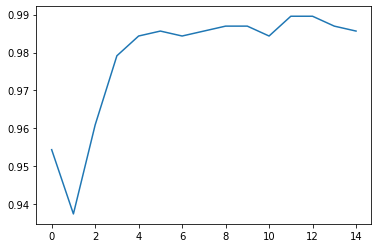

In [76]:
plt.plot(acc)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(testY, predicts,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      0.98      0.99       406
without_mask       0.98      0.99      0.98       361

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



In [ ]:
import pandas as pd

Error: Session cannot generate requests

In [11]:
len(tf.config.experimental.list_physical_devices('GPU'))

0

In [87]:
lb.classes_

array(['with_mask', 'without_mask'], dtype='<U12')

In [9]:
tf.test.is_built_with_cuda()

True

In [13]:
pip install matplotlib


  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [81]:
finalmodel.save_weights('C:/Users/Lenovo/Desktop/virtual')